In [17]:
# import the necessary packages and mnist dataset
import numpy as np
import matplotlib.pyplot as plt
# import the MNIST dataset
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras import utils


In [18]:
# load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# plot 4 images as gray scale
X_train = X_train.reshape(X_train.shape[0], 28 * 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28 * 28).astype('float32')


In [19]:
# normalize inputs from 0-255 to 0-1
X_train /= 255
X_test /= 255
y_train = utils.to_categorical(y_train)
y_test = utils.to_categorical(y_test)

In [20]:
# sequence the model
model = Sequential()


In [21]:
# add layers to the model
model.add(Dense(512, input_shape=(28 * 28,), activation='relu'))

In [24]:
# reduce overfitting
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train , y_train, epochs=10, batch_size=128, validation_data=(X_test, y_test))


Epoch 1/10
469/469 [==============================] - 21s 39ms/step - loss: 0.6773 - accuracy: 0.8015 - val_loss: 0.1205 - val_accuracy: 0.9795
Epoch 2/10
469/469 [==============================] - 18s 38ms/step - loss: 0.5215 - accuracy: 0.8104 - val_loss: 0.1049 - val_accuracy: 0.9817
Epoch 3/10
469/469 [==============================] - 18s 37ms/step - loss: 0.5120 - accuracy: 0.8112 - val_loss: 0.1114 - val_accuracy: 0.9795
Epoch 4/10
469/469 [==============================] - 22s 46ms/step - loss: 0.5089 - accuracy: 0.8123 - val_loss: 0.0939 - val_accuracy: 0.9836
Epoch 5/10
469/469 [==============================] - 22s 48ms/step - loss: 0.5062 - accuracy: 0.8133 - val_loss: 0.0959 - val_accuracy: 0.9816
Epoch 6/10
469/469 [==============================] - 21s 46ms/step - loss: 0.5061 - accuracy: 0.8111 - val_loss: 0.0905 - val_accuracy: 0.9822
Epoch 7/10
469/469 [==============================] - 24s 50ms/step - loss: 0.4967 - accuracy: 0.8148 - val_loss: 0.0950 - val_accuracy:

In [23]:
# evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')


313/313 [==============================] - 2s 7ms/step - loss: 0.0672 - accuracy: 0.9810
Test loss: 0.0672
Test accuracy: 0.9810


In [15]:
# predict the first images in the test set
predictions = model.predict(X_test)


313/313 [==============================] - 2s 6ms/step


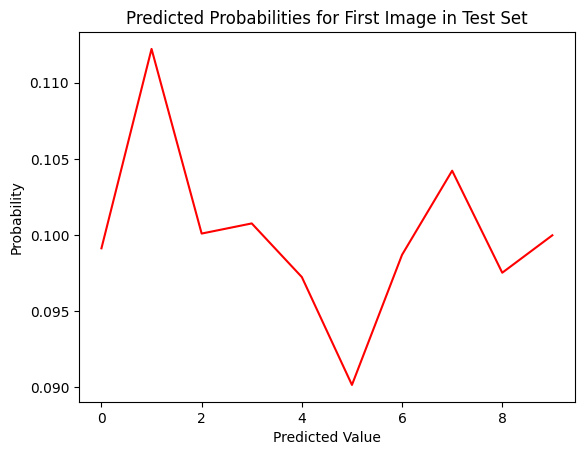

In [16]:
# plot the images in the test set
plt.plot(predictions[363], label='Predicted', color='red')
plt.xlabel('Predicted Value')
plt.ylabel('Probability')
plt.title('Predicted Probabilities for First Image in Test Set')
# show the plot
plt.show()